<a href="https://colab.research.google.com/github/SodisettiRakesh123/hanuman-/blob/main/House_Price_Prediction_Machine_Learning_Script222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the opendatasets library if you haven't already
!pip install opendatasets -q

In [1]:
import opendatasets as od

# Download the dataset from Kaggle
# You will be prompted to enter your Kaggle username and API key
od.download("https://www.kaggle.com/datasets/harlfoxem/housesalesprediction")

Skipping, found downloaded files in "./housesalesprediction" (use force=True to force download)


--- Loading Real-World Dataset ---
Dataset 'kc_house_data.csv' loaded successfully.

Dataset Head:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0 

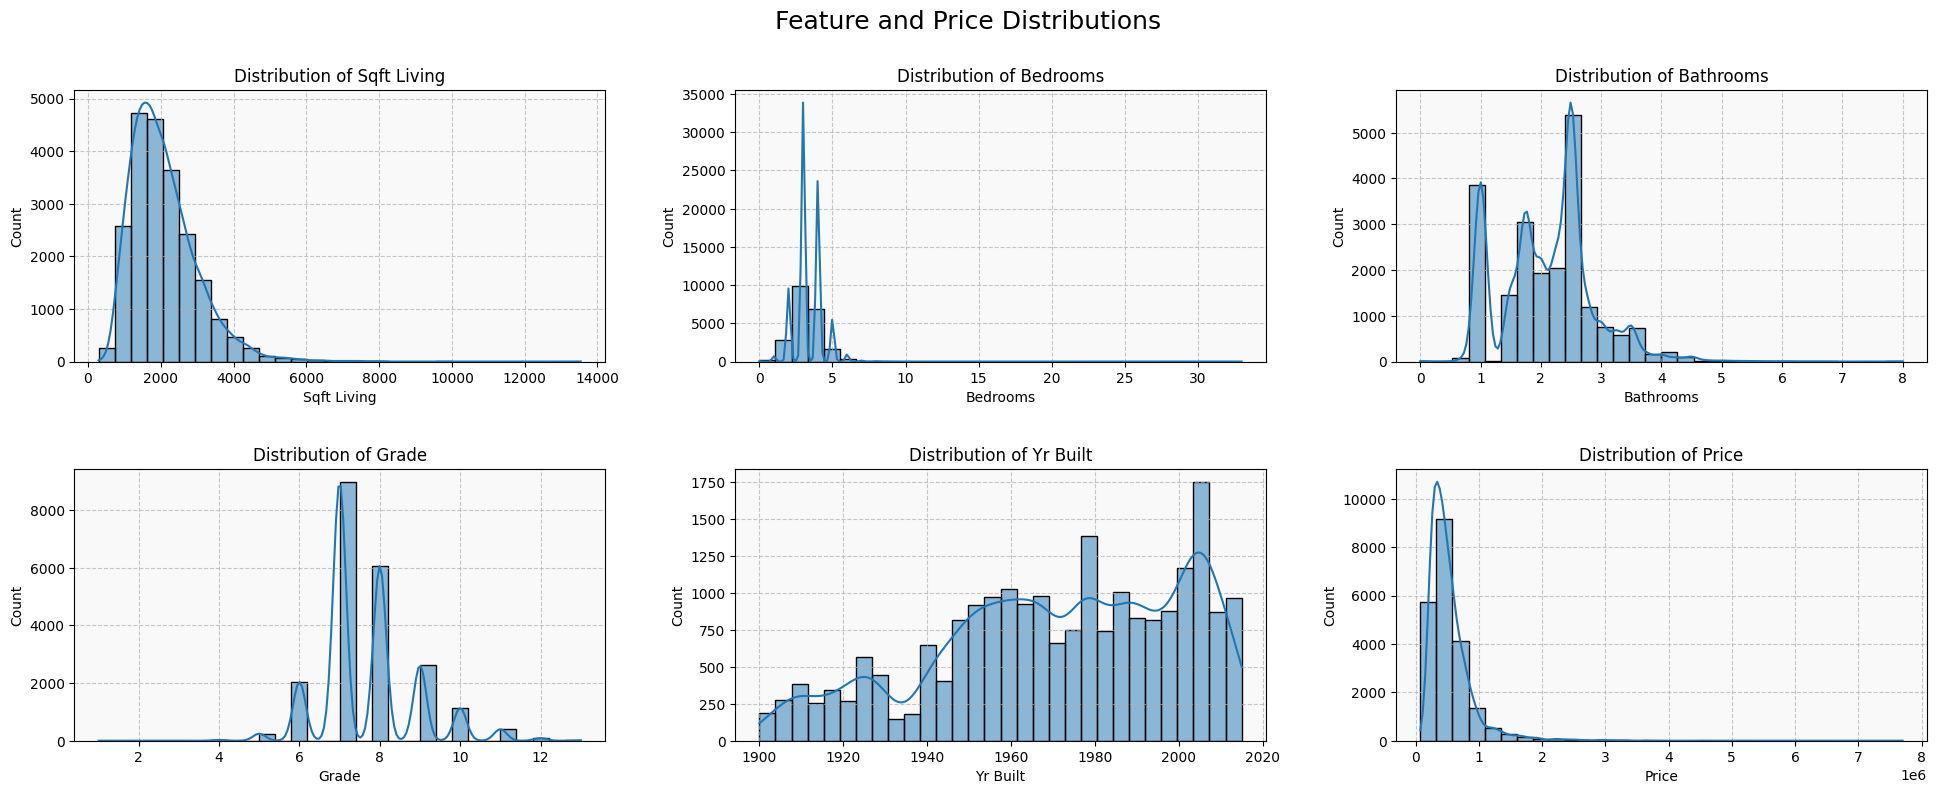

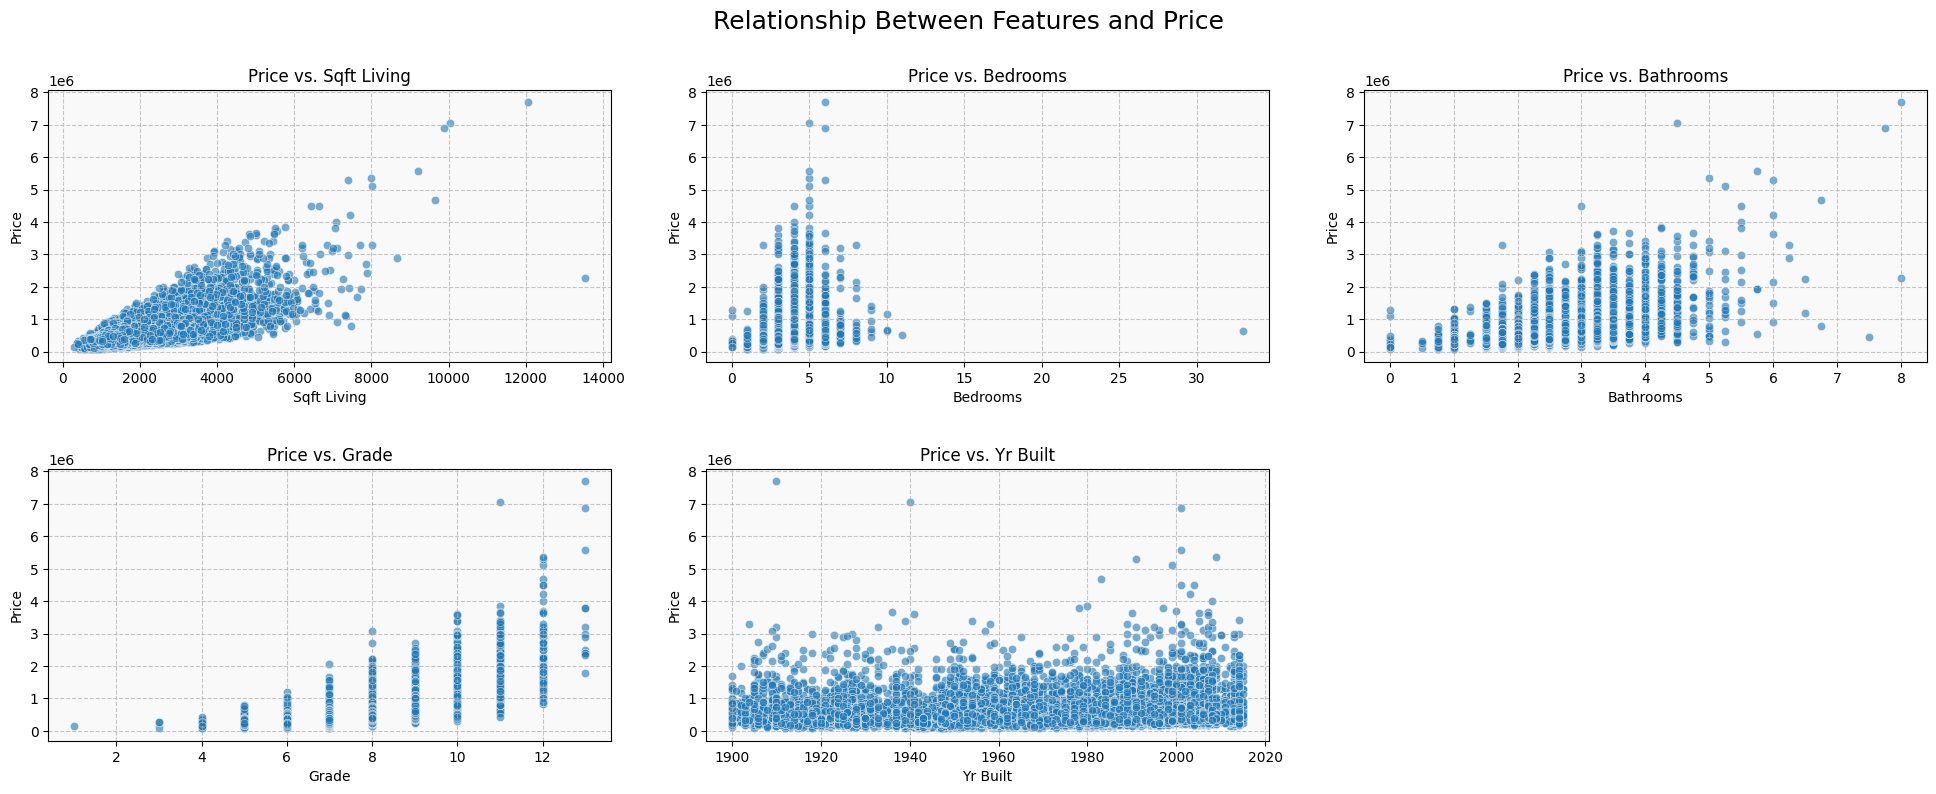


Correlation Matrix for selected numerical features:


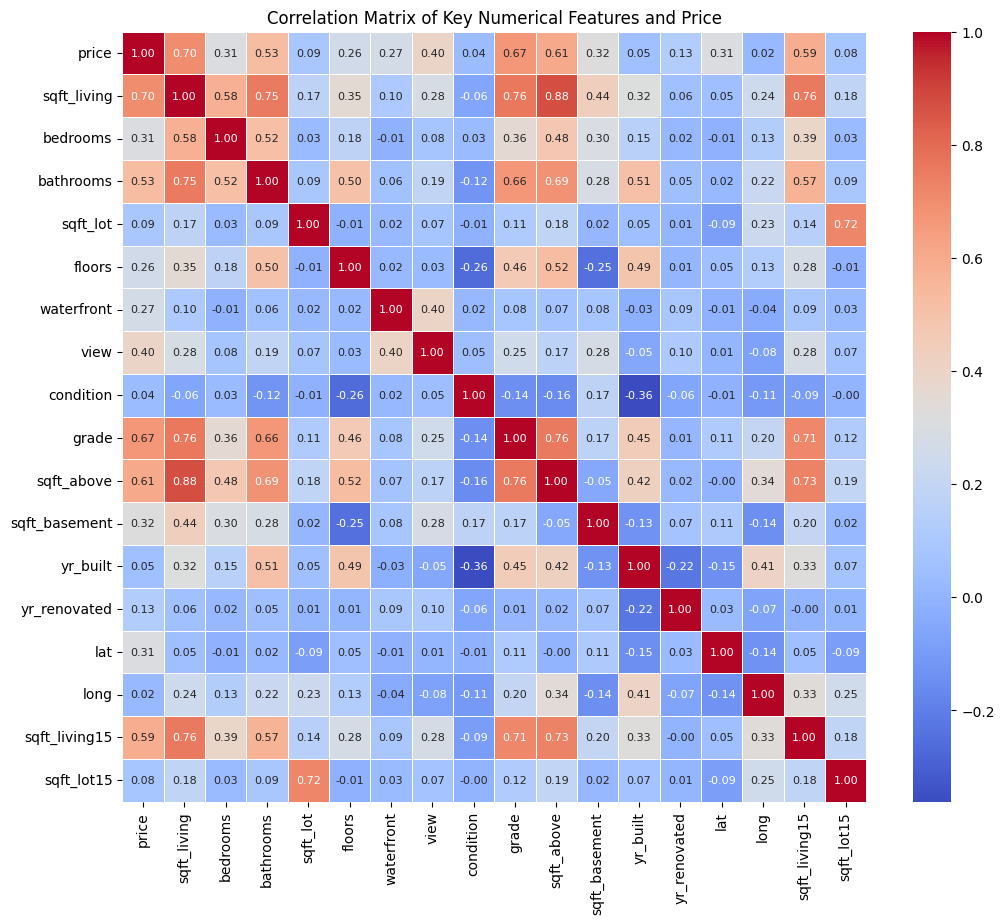


--- Performing Data Preprocessing ---

Missing values after handling:
sqft_living      0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
was_renovated    0
zipcode          0
dtype: int64
Training set size: 17290 samples
Testing set size: 4323 samples

--- Training Machine Learning Models ---

Training Linear Regression Model...
Linear Regression Model trained.

Training Random Forest Regressor Model...
Random Forest Regressor Model trained.

--- Evaluating Model Performance ---

Linear Regression Model Evaluation:
  Mean Absolute Error (MAE): ₹98,753.95
  Mean Squared Error (MSE): ₹29,212,202,302.71
  Root Mean Squared Error (RMSE): ₹170,915.78
  R-squared (R²): 0.8068

Random Forest Regressor Model Evaluation:
  Mean Absolute Error (MAE): ₹72,720.25


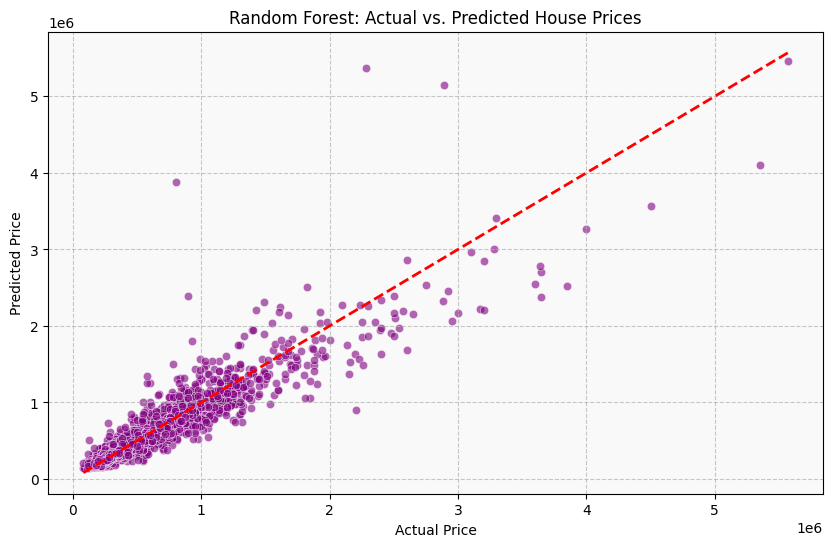


--- Saving Trained Model and Preprocessor ---
Random Forest Pipeline saved as 'house_price_rf_pipeline.pkl'
Model features list saved as 'model_features.pkl'

--- ML Project Script Complete ---
You can now use 'house_price_rf_pipeline.pkl' and 'model_features.pkl' to make predictions.


In [1]:
# house_price_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib # For saving and loading models
import warnings

# Suppress specific warnings for cleaner output, especially related to seaborn plots
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning) # For general future warnings

# --- 1. Data Loading ---
# IMPORTANT:
# For this script to run, you need a real dataset.
# A commonly used dataset is the "King County House Sales" dataset.
# You can download it from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
# Save the downloaded CSV file (e.g., 'kc_house_data.csv') in the same directory as this script.

print("--- Loading Real-World Dataset ---")
try:
    # Adjust this path if your file is named differently or in another location
    data = pd.read_csv('kc_house_data.csv.zip')
    print("Dataset 'kc_house_data.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'kc_house_data.csv' not found.")
    print("Please download the King County House Sales dataset from Kaggle:")
    print("https://www.kaggle.com/datasets/harlfoxem/housesalesprediction")
    print("And place 'kc_house_data.csv' in the same directory as this script.")
    # Exit or provide synthetic data fallback if you want to keep it runnable without download
    # For now, we'll exit if the file isn't found to ensure real data is used.
    exit()

print("\nDataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nDataset Description:")
print(data.describe())

# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- Performing Exploratory Data Analysis (EDA) ---")

# Check for missing values
print("\nMissing values per column (before handling):")
print(data.isnull().sum())

# Drop the 'id' and 'date' columns as they are not useful for prediction
# 'date' could be engineered into 'month', 'year', 'day_of_week' etc. but for simplicity, we drop it.
data.drop(['id', 'date'], axis=1, inplace=True)

# Visualize distributions of key features and target variable
# Select a subset of features for visualization to keep plots manageable
eda_features = ['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'yr_built', 'price']

plt.figure(figsize=(20, 8))
for i, feature in enumerate(eda_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout(pad=3.0)
plt.suptitle('Feature and Price Distributions', y=1.02, fontsize=18)
plt.show()

# Visualize relationships between key features and price using scatter plots
plt.figure(figsize=(20, 8))
for i, feature in enumerate(['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'yr_built']):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=data[feature], y=data['price'], alpha=0.6)
    plt.title(f'Price vs. {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Price')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout(pad=3.0)
plt.suptitle('Relationship Between Features and Price', y=1.02, fontsize=18)
plt.show()

# Correlation Matrix (Heatmap) for selected numerical features
print("\nCorrelation Matrix for selected numerical features:")
# Include more numerical features that are likely to be important
numerical_features_for_corr = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot',
                               'floors', 'waterfront', 'view', 'condition', 'grade',
                               'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                               'lat', 'long', 'sqft_living15', 'sqft_lot15']
correlation_matrix = data[numerical_features_for_corr].corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Key Numerical Features and Price')
plt.show()

# --- 3. Data Preprocessing ---
print("\n--- Performing Data Preprocessing ---")

# Define features (X) and target (y)
# Selecting a broader set of features for a more realistic model
# 'zipcode' is treated as a categorical feature as it represents geographical areas
# 'yr_renovated' has many zeros, indicating no renovation. We can create a binary feature for renovation.
# 'sqft_living15' and 'sqft_lot15' are average sizes of nearest 15 neighbors, useful for neighborhood context.
numerical_features = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
                      'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                      'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorical_features = ['zipcode'] # Treat zipcode as categorical

# Handle 'yr_renovated': Create a binary feature 'was_renovated'
data['was_renovated'] = data['yr_renovated'].apply(lambda yr: 1 if yr > 0 else 0)
numerical_features.append('was_renovated') # Add to numerical features

X = data[numerical_features + categorical_features]
y = data['price']

# Handle missing values (if any, though this dataset is quite clean)
# For simplicity, we'll fill numerical NaNs with median and categorical with mode.
# In a real project, you'd inspect each column with NaNs carefully.
for col in numerical_features:
    if X[col].isnull().any():
        X[col].fillna(X[col].median(), inplace=True)
for col in categorical_features:
    if X[col].isnull().any():
        X[col].fillna(X[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(X.isnull().sum())

# Create a preprocessing pipeline
# Numerical features will be scaled
# Categorical features will be one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# --- 4. Model Training ---
print("\n--- Training Machine Learning Models ---")

# Create a pipeline for Linear Regression: Preprocessing + Model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

print("\nTraining Linear Regression Model...")
lr_pipeline.fit(X_train, y_train)
print("Linear Regression Model trained.")

# Create a pipeline for Random Forest Regressor: Preprocessing + Model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

print("\nTraining Random Forest Regressor Model...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest Regressor Model trained.")

# --- 5. Model Evaluation ---
print("\n--- Evaluating Model Performance ---")

# Predictions for Linear Regression
lr_predictions = lr_pipeline.predict(X_test)

# Predictions for Random Forest Regressor
rf_predictions = rf_pipeline.predict(X_test)

# Evaluation Metrics for Linear Regression
print("\nLinear Regression Model Evaluation:")
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"  Mean Absolute Error (MAE): ₹{lr_mae:,.2f}")
print(f"  Mean Squared Error (MSE): ₹{lr_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ₹{lr_rmse:,.2f}")
print(f"  R-squared (R²): {lr_r2:.4f}")

# Evaluation Metrics for Random Forest Regressor
print("\nRandom Forest Regressor Model Evaluation:")
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"  Mean Absolute Error (MAE): ₹{rf_mae:,.2f}")
print(f"  Mean Squared Error (MSE): ₹{rf_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ₹{rf_rmse:,.2f}")
print(f"  R-squared (R²): {rf_r2:.4f}")

# Visualize Actual vs. Predicted Prices for Random Forest (generally better performance)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_predictions, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Random Forest: Actual vs. Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.show()

# --- 6. Save the Trained Model and Preprocessor ---
print("\n--- Saving Trained Model and Preprocessor ---")
# It's good practice to save the entire pipeline, as it includes the preprocessor
joblib.dump(rf_pipeline, 'house_price_rf_pipeline.pkl')
print("Random Forest Pipeline saved as 'house_price_rf_pipeline.pkl'")

# Save the list of features and their order for later use in the web app
model_features = numerical_features + categorical_features
joblib.dump(model_features, 'model_features.pkl')
print("Model features list saved as 'model_features.pkl'")

print("\n--- ML Project Script Complete ---")
print("You can now use 'house_price_rf_pipeline.pkl' and 'model_features.pkl' to make predictions.")